### Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Fetch the data

In [81]:
pkdata = pd.read_csv(r"D:\Project4\parkinsons.csv")
pkdata.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Remove feature name as there is no impact

In [83]:
pkdata = pkdata.drop('name', axis=1)

### To check null values

In [85]:
pkdata.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [87]:
pd.pandas.set_option('display.max_columns', None)
pkdata.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### New data

In [89]:
new_pkdata = pkdata

### To check Outliers

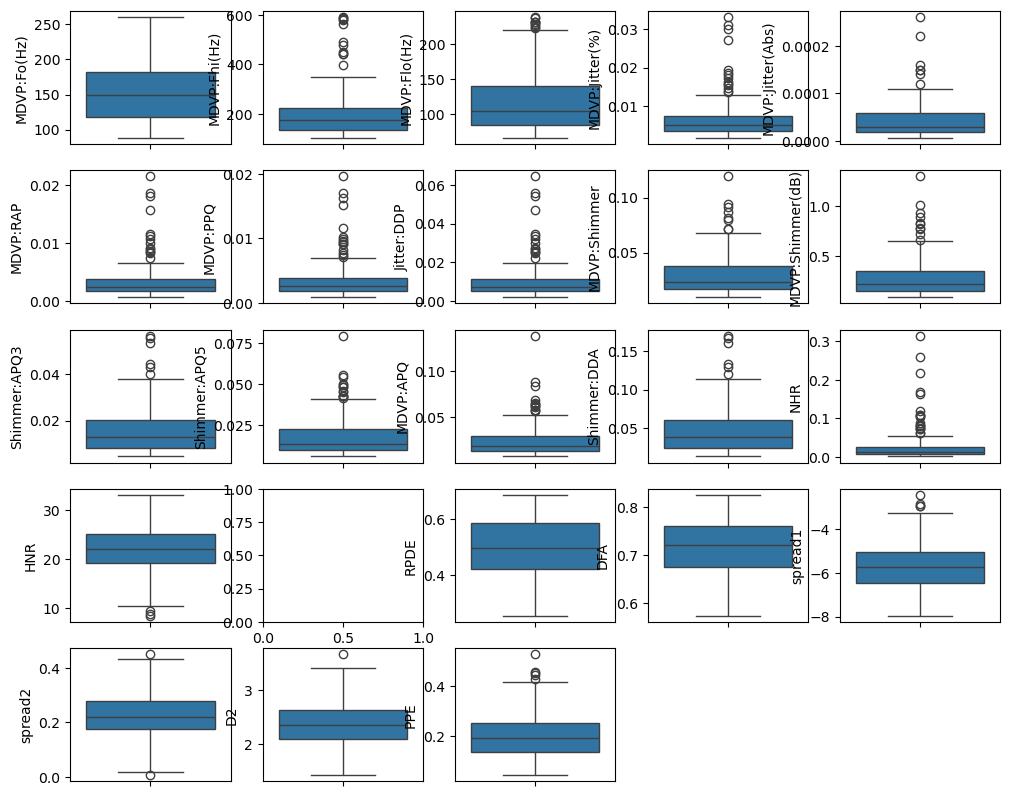

<Figure size 640x480 with 0 Axes>

In [91]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes,new_pkdata.columns):
    if col != 'status':
        sns.boxplot(new_pkdata[col], ax=ax)

for ax in axes[len(new_pkdata.columns):]:
    ax.set_visible(False)

plt.show()
plt.tight_layout()

### To get Outlier columns

In [93]:
outlier_cols = []

for col in new_pkdata.columns:
    if col == 'status':
       continue
    if not pd.api.types.is_numeric_dtype(new_pkdata[col]):
         continue
    Q1 = new_pkdata[col].quantile(0.25)
    Q3 = new_pkdata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
# check if any values are outside bounds
    if ((new_pkdata[col] < lower) | (new_pkdata[col] > upper)).any():
        outlier_cols.append(col)

outlier_cols

['MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'spread1',
 'spread2',
 'D2',
 'PPE']

### Handling Outliers with log trasformation

In [95]:
for col in outlier_cols:
    # Shift column if needed
    if (new_pkdata[col] <= 0).any():
        new_pkdata[col] = new_pkdata[col] - new_pkdata[col].min() + 1
        
    new_pkdata[col] = np.log(new_pkdata[col])

### Features and Target

In [99]:
F = new_pkdata.drop(['status'], axis=1)
t = new_pkdata['status']

### SMOTE Technique

In [102]:
smote = SMOTETomek()
F_smote, t_smote = smote.fit_resample(F,t)

### Split Test and Train

In [124]:
F_train,F_test,t_train,t_test = train_test_split(F_smote,t_smote, test_size=0.3, random_state=42)

### Logistic Regression CV

In [130]:
lr_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=123))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

lr_grid = GridSearchCV(
    lr_cv,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
lr_grid.fit(F_train, t_train)

# Best model
best_logreg = lr_grid.best_estimator_

# Predictions
t_pred = best_logreg.predict(F_test)
t_pred_prob = best_logreg.predict_proba(F_test)[:, 1]

# Metrics
accuracy_LR  = accuracy_score(t_test, t_pred)
precision_LR = precision_score(t_test, t_pred)
recall_LR    = recall_score(t_test, t_pred)
f1_LR        = f1_score(t_test, t_pred)
roc_auc_LR   = roc_auc_score(t_test, t_pred_prob)

print(f"Accuracy      : {accuracy_LR:.4f}")
print(f"Precision     : {precision_LR:.4f}")
print(f"Recall        : {recall_LR:.4f}")
print(f"F1 Score      : {f1_LR:.4f}")
print(f"AUC-ROC Score : {roc_auc_LR:.4f}")
print(classification_report(t_test, t_pred))

Accuracy      : 0.9310
Precision     : 0.9333
Recall        : 0.9333
F1 Score      : 0.9333
AUC-ROC Score : 0.9783
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.93      0.93      0.93        45

    accuracy                           0.93        87
   macro avg       0.93      0.93      0.93        87
weighted avg       0.93      0.93      0.93        87



### Pickle File

In [135]:
import pickle
filename = 'parkinsons_model.pkl'
pickle.dump(lr_grid.best_estimator_, open(filename, 'wb'))

### EDA

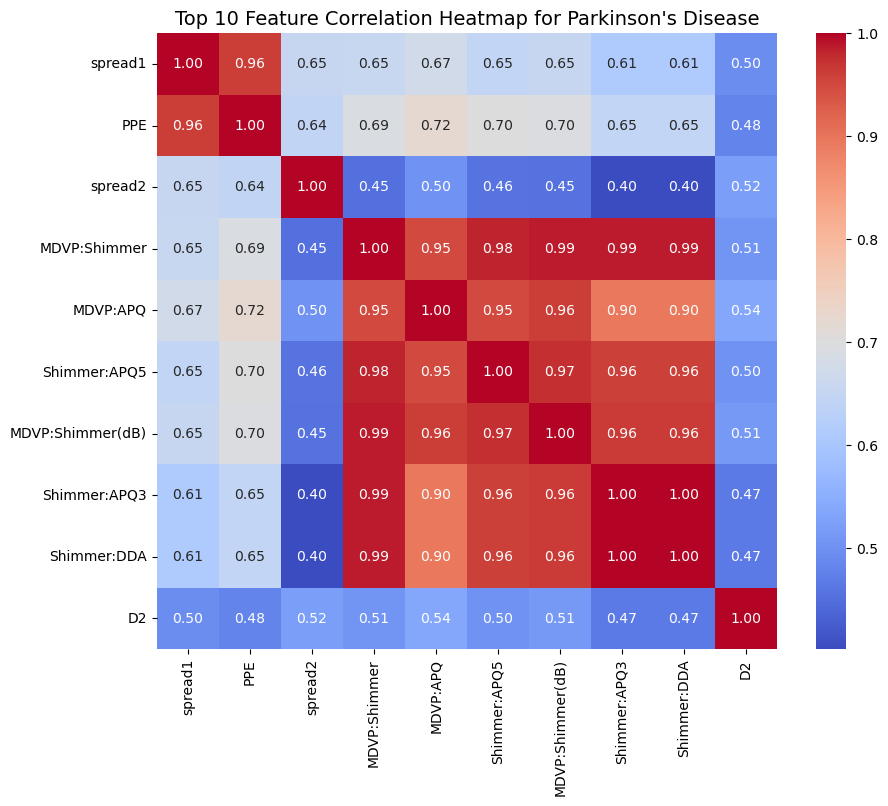

In [146]:
# Load Parkinson's dataset
pkdata = pd.read_csv(r"D:\Project4\parkinsons.csv")

# Drop name column
if 'name' in pkdata.columns:
    pkdata = pkdata.drop('name', axis=1)

# Encode target if needed
if pkdata['status'].dtype == 'object':
    le = LabelEncoder()
    pkdata['status'] = le.fit_transform(pkdata['status'])

# Compute correlation matrix
corr_matrix = pkdata.corr()

# Sort features by correlation with target
corr_target = corr_matrix['status'].sort_values(ascending=False)

# Select top 10 features
top_features = corr_target.index[1:11]  # skip 'status' itself

plt.figure(figsize=(10,8))
sns.heatmap(pkdata[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Top 10 Feature Correlation Heatmap for Parkinson's Disease", fontsize=14)
plt.show()